In [1]:
%pylab inline
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_train_variant = pd.read_csv("training_variants").set_index("ID")
df_train_text = pd.read_csv("training_text", delimiter = "\|\|", skiprows=1, names=['ID', 'Text'], engine="python").set_index('ID')

df_test_variant = pd.read_csv("test_variants").set_index("ID")
df_test_text = pd.read_csv("test_text", delimiter = "\|\|", skiprows = 1, names=["ID", "Text"], engine="python").set_index("ID")

In [3]:
df_train = pd.concat([df_train_variant, df_train_text ], axis=1)
df_test = pd.concat([df_test_variant, df_test_text], axis=1)

In [4]:
display(df_train.head())
display(df_test.head())

,Gene,Variation,Class,Text
ID,,,,
0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


,Gene,Variation,Text
ID,,,
0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


In [5]:
print(df_train["Gene"].value_counts()[:10])
print(df_train["Class"].value_counts())

print(df_test["Gene"].value_counts()[:10])

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ALK        69
ERBB2      69
PDGFRA     60
Name: Gene, dtype: int64
7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64
F8       134
CFTR      57
F9        54
G6PD      46
GBA       39
PAH       38
AR        38
CASR      37
ARSA      30
BRCA1     29
Name: Gene, dtype: int64


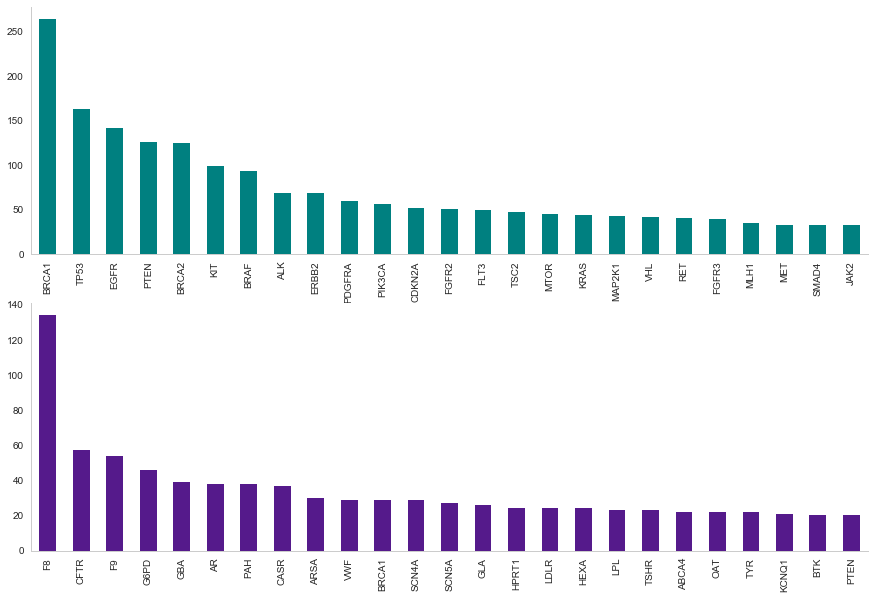

In [6]:
most_common_train = df_train["Gene"].value_counts()[:25] 
most_common_genes = most_common_train.index
df_train_most_common = df_train[df_train["Gene"].isin(most_common_genes)]
df_train_most_common_counts = df_train_most_common["Gene"].value_counts()

most_common_test = df_test["Gene"].value_counts()[:25] 
most_common_genes = most_common_test.index
df_test_most_common = df_test[df_test["Gene"].isin(most_common_genes)]
df_test_most_common_counts = df_test_most_common["Gene"].value_counts()

plt.figure(figsize=(15,10))
ax = plt.subplot(211)
df_train_most_common_counts.plot("bar", color="teal")
plt.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax = plt.subplot(212)
df_test_most_common_counts.plot("bar", color="#551a8b")
plt.grid(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)


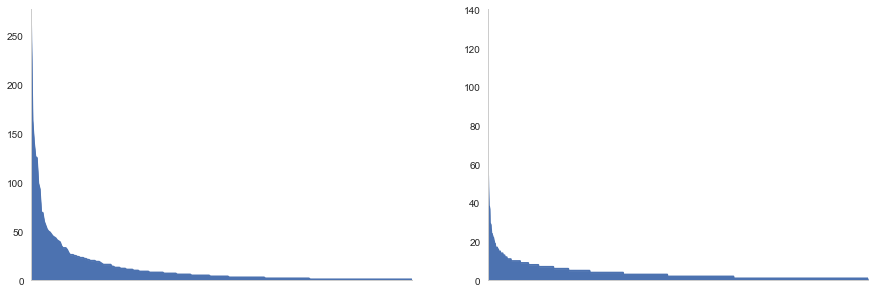

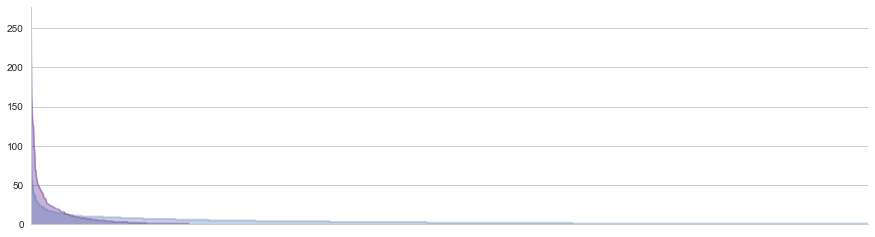

In [40]:
plt.figure(figsize=(15,5))
ax = plt.subplot(121)
df_train["Gene"].value_counts().plot("area")
plt.grid(False)
ax.get_xaxis().set_ticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax = plt.subplot(122)
df_test["Gene"].value_counts().plot("area")
plt.grid(False)
ax.get_xaxis().set_ticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.figure(figsize=(15,4))
ax = plt.subplot()
df_train["Gene"].value_counts().plot("area", alpha=0.33, color="#551a8b")
df_test["Gene"].value_counts().plot("area", alpha=0.33)
ax.get_xaxis().set_ticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

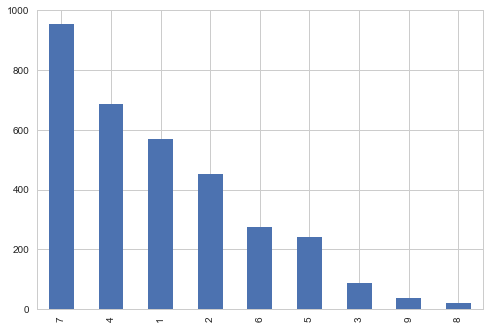

In [8]:
df_train["Class"].value_counts().plot(kind="bar", color = "#551a8b")

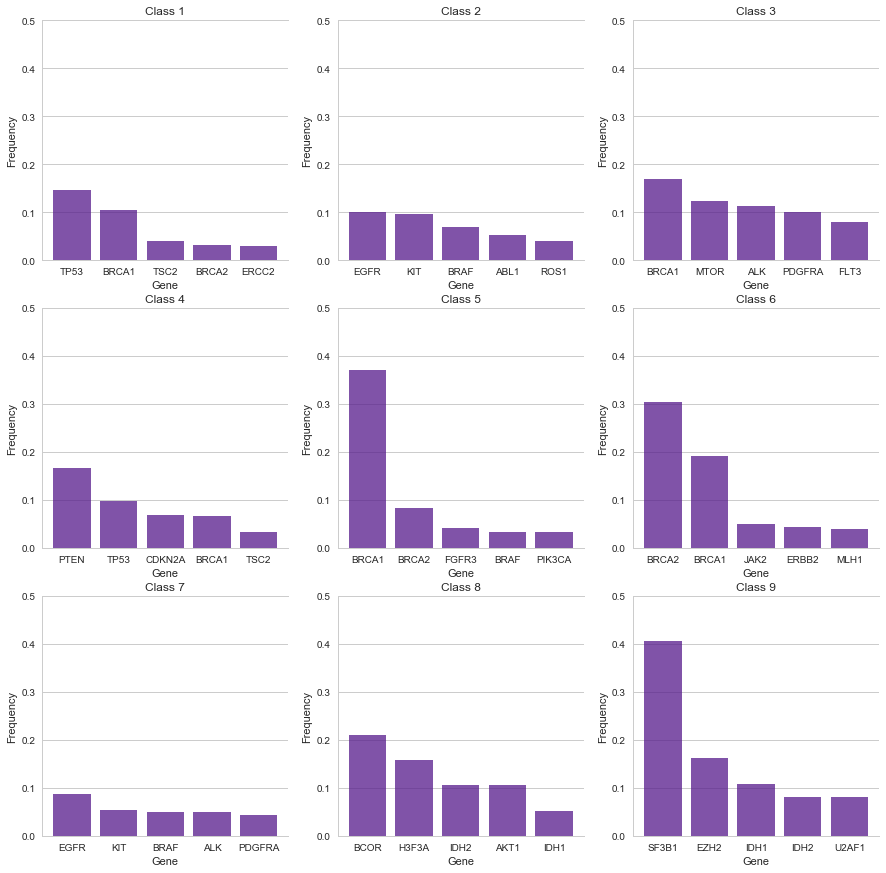

In [42]:
df_train_grouped = df_train.groupby("Class")

plt.figure(figsize = (15,15))
for i,group in enumerate(df_train_grouped):
    most_frequent = group[1]["Gene"].value_counts()[:5]
    total = group[1]["Gene"].value_counts().sum()
    fraction = most_frequent/total
    ax = plt.subplot(3,3,i+1)
    plt.title("Class {}".format(i+1))
    plt.xticks(range(5), group[1]["Gene"].value_counts()[:5].index)
    plt.xlabel("Gene")
    plt.ylabel("Frequency")
    plt.ylim(0, 0.5)
    plt.grid(axis='x')
    ax.spines["right"].set_visible(False)
    fig = plt.bar(range(5), most_frequent/total, color="#551a8b", alpha=0.75)

In [56]:
for group in df_train_grouped:
        for text in group[1]["Text"]:
            print(len(text))
        break

39765
99183
54603
18609
18609
123632
128722
25763
25763
16657
16657
25763
16657
25763
25763
29690
21894
25763
25763
16657
102294
77024
129574
15689
104078
39386
203944
117197
131025
137597
80785
52585
180421
121045
121045
126609
103517
26650
84280
78984
34983
48681
76329
70113
70113
134889
10248
81496
103000
36336
46316
25920
44566
31412
30887
22914
87989
34203
28047
43542
112386
62392
46362
47138
31412
122428
75650
70793
48512
27462
31612
44084
30887
98692
61011
172195
85996
30887
61011
47590
34203
51089
84615
51130
135753
30237
109995
28047
31656
121856
98692
25051
32963
30237
43239
62189
38162
61011
109995
26634
22914
24674
62392
109995
120201
51130
61011
88175
35751
72277
24674
31412
62392
102393
19797
60427
62392
31412
77840
109995
51130
51130
77599
108282
21095
43858
30887
64052
32963
83499
43239
55625
34097
30237
87989
26018
43773
57825
37847
30801
37847
97320
37847
37847
79848
88239
37847
30801
49045
65155
65155
65155
35324
140585
65155
65155
65155
65155
65155
65155
29617
58419